Домашнее задание по теме «Функции потерь и оптимизация»
Преподаватель: Алексей Кузьмин
Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/

Реализовать самостоятельно логистическую регрессию

Обучить ее методом градиентного спуска
Методом nesterov momentum
Методом rmsprop
В качестве dataset’а взять Iris, оставив 2 класса:

Iris Versicolor
Iris Virginica

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
iris = datasets.load_iris()

In [3]:
type( iris )

sklearn.utils.Bunch

In [4]:
for key in iris.keys():
    print( key )

data
target
target_names
DESCR
feature_names
filename


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
print(iris.feature_names)
print(type(iris.data))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'numpy.ndarray'>


sepal - чашелистик

petal - лепесток

In [7]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = pd.Series(iris.target)
print(data.head())
print(data.tail())
print(data.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0        

In [9]:
#drop samples with third class
#data = data[((data['target'] == 0) or (data['target'] == 1))]
label_a = data['target'] == 0
label_b = data['target'] == 1
data = data[label_a | label_b]
print(data.head())
print(data.tail())
print(data.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8              

In [10]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
Y = data[['target']]

In [11]:
sc = StandardScaler()
X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = \
    sc.fit_transform(X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
print(Y.target.dtypes)

int64


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/user/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas

In [12]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.581066,0.841837,-1.012978,-1.042111
1,-0.894309,-0.207835,-1.012978,-1.042111
2,-1.207552,0.212034,-1.082312,-1.042111
3,-1.364174,0.002099,-0.943643,-1.042111
4,-0.737687,1.051772,-1.012978,-1.042111


In [13]:
print(Y.dtypes)

target    int64
dtype: object


![title](img/grad_descent.png)

In [14]:
def my_log_loss(Y_label, Y_pred):
    x_entropy_loss = 0
    for yi, ypred in zip(Y_label, Y_pred):
        if (ypred == 0):
                print("error")
                return 1000
        elif (ypred == 1):
                print("error")
                return 1000
        else:
                x_entropy_loss += -yi * np.log(ypred) - (1. - yi) * np.log((1. - ypred))
    return x_entropy_loss 

# Функция градиентного спуска. Моя переделка от стохастического градиента
def get_grad_descent(X, Y_label):
    my_sigmoid = lambda z: pd.DataFrame(1/(1 + np.exp(-z)))
    h_theta = lambda X, Theta: my_sigmoid(X.dot( Theta))
    X_curr = lambda X, l: X[X.columns[l]].transpose()
    Xtheta0 = pd.DataFrame(np.ones(X.shape[0])) # For theta0 free member
    X = X.join(Xtheta0)
    L = X.shape[1]
    N = X.shape[0]
    l = 0
    init_theta = 0.5
    Theta = np.full(X.shape[1], init_theta)
    Theta_old = np.full(X.shape[1], init_theta)
    old_grad = 50;
    eps = 0.000001 #
    iteration_limit = 10000
    iteration_current = 0
    alpha = (1/N*L)*1  #learning rate
    error = 1
    error_hist = []
    while (True):
        # z = np.dot(X, Theta=) 
        # h = my_sigmoid(z)
        grad_stohastic = []
        grad_ = 0
        for l in range(L):
            ht = h_theta(X, Theta)
            deltaY = ht[ht.columns[0]] - Y[Y.columns[0]]
            tmpsum = X_curr(X, l).dot( deltaY )
            grad_stohastic.append(tmpsum)
            grad_ = sum(grad_stohastic)
            Theta[l] = Theta[l] - alpha*grad_
        #Theta_old = Theta
        curr_grad = grad_
        error = np.abs(curr_grad - old_grad)
        old_grad = curr_grad;
        iteration_current += 1
        error_hist.append(error)
        if ((error < eps) | (iteration_current > iteration_limit) | (error > 1000) ):
            break
    print("error:", error)
    print("old_grad", old_grad)
    print("error_hist[-1:-50:-1]", error_hist[-1:-50:-1])
    print("Theta", Theta)
    return Theta

# Функция получения предсказаний
def get_predictions(X, Y, Theta):
    my_sigmoid = lambda z: 1/(1 + np.exp(-z))
    h_theta = lambda z: my_sigmoid(z)
    hyperplane_eq = lambda sample, Theta: sample.transpose().dot(Theta)
    Xtheta0 = pd.DataFrame(np.ones(X.shape[0])) # For theta0 free member
    X = X.join(Xtheta0)
    L = X.shape[1]
    N = X.shape[0]
    Y_predictions = []
    for i in range(N):
        sample = X.iloc[i]
        z = sample.transpose().dot( Theta)
        probability_curr = h_theta(z)
        Y_pred_curr = (probability_curr >= 0.5)
        #print(i," ",Y_pred_curr, " ",Y.iloc[i,0])
        Y_predictions.append(Y_pred_curr)
    Y_predictions = pd.DataFrame(Y_predictions)
    return Y_predictions



![title](img/nesterov.png)

In [15]:
# Функция оптимизации моментов Нестерова
def get_grad_descent_nesterov(X, Y_label):
    my_sigmoid = lambda z: pd.DataFrame(1/(1 + np.exp(-z)))
    h_theta = lambda X, Theta: my_sigmoid(X.dot( Theta))
    X_curr = lambda X, l: X[X.columns[l]].transpose()
    Xtheta0 = pd.DataFrame(np.ones(X.shape[0])) # For theta0 free member
    X = X.join(Xtheta0)
    L = X.shape[1]
    N = X.shape[0]
    l = 0
    init_theta = 0.5
    Theta = np.full(X.shape[1], init_theta)
    Theta_old = np.full(X.shape[1], init_theta)
    Theta_sig = Theta
    old_grad = 50;
    eps = 0.000001 #
    iteration_limit = 10000
    iteration_current = 0
    eta = (1/N*L)  #learning rate
    mu = 0.8
    new_m = 0
    old_m = 0
    error = 1
    error_hist = []
    while (True):
        # z = np.dot(X, Theta=) 
        # h = my_sigmoid(z)
        grad_stohastic = []
        grad_ = 0
        for l in range(L):
            Theta_sig = Theta - eta*mu*old_m
            ht = h_theta(X, Theta_sig)
            deltaY = ht[ht.columns[0]] - Y[Y.columns[0]]
            tmpsum = X_curr(X, l).dot( deltaY )
            grad_stohastic.append(tmpsum)
            grad_ = sum(grad_stohastic)
            new_m = mu*old_m + grad_
            Theta[l] = Theta[l] - eta*new_m
        #Theta_old = Theta
        old_m = new_m
        curr_grad = grad_
        error = np.abs(curr_grad - old_grad)
        old_grad = curr_grad;
        iteration_current += 1
        error_hist.append(error)
        if ((error < eps) | (iteration_current > iteration_limit) | (error > 1000) ):
            break
    print("error:", error)
    print("old_grad", old_grad)
    print("error_hist[-1:-50:-1]", error_hist[-1:-50:-1])
    print("Theta", Theta)
    return Theta

![title](img/rmsprop.png)

In [16]:
# Функция оптимизации rmsprop
def get_rmsprop(X, Y_label):
    my_sigmoid = lambda z: pd.DataFrame(1/(1 + np.exp(-z)))
    h_theta = lambda X, Theta: my_sigmoid(X.dot( Theta))
    X_curr = lambda X, l: X[X.columns[l]].transpose()
    Xtheta0 = pd.DataFrame(np.ones(X.shape[0])) # For theta0 free member
    X = X.join(Xtheta0)
    L = X.shape[1]
    N = X.shape[0]
    l = 0
    init_theta = 0.5
    Theta = np.full(X.shape[1], init_theta)
    Theta_old = np.full(X.shape[1], init_theta)
    Theta_sig = Theta
    old_grad = 50;
    eps = 0.000001 #
    iteration_limit = 10000
    iteration_current = 0
    eta = (1/N*L)  #learning rate
    v = 0.8
    eps_rms = 0.1 #
    new_n = 0
    old_n = 0
    error = 1
    error_hist = []
    while (True):
        # z = np.dot(X, Theta=) 
        # h = my_sigmoid(z)
        grad_stohastic = []
        grad_ = 0
        for l in range(L):
            Theta_sig = Theta
            ht = h_theta(X, Theta_sig)
            deltaY = ht[ht.columns[0]] - Y[Y.columns[0]]
            tmpsum = X_curr(X, l).dot( deltaY )
            grad_stohastic.append(tmpsum)
            grad_ = sum(grad_stohastic)
            new_n = v*old_n + (1-v)*np.square(grad_)
            Theta[l] = Theta[l] - eta*grad_/(np.sqrt(new_n) + eps_rms)
        #Theta_old = Theta
        old_n = new_n
        curr_grad = grad_
        error = np.abs(curr_grad - old_grad)
        old_grad = curr_grad;
        iteration_current += 1
        error_hist.append(error)
        if ((error < eps) | (iteration_current > iteration_limit) | (error > 1000) ):
            break
    print("error:", error)
    print("old_grad", old_grad)
    print("error_hist[-1:-50:-1]", error_hist[-1:-50:-1])
    print("Theta", Theta)
    return Theta

In [17]:
Theta = get_grad_descent(X, Y)
Theta2 = get_grad_descent_nesterov(X, Y)
Theta3 = get_rmsprop(X, Y)

error: 9.998704483130463e-07
old_grad -0.002121674408647859
error_hist[-1:-50:-1] [9.998704483130463e-07, 1.0008060907793284e-06, 1.0017430419305418e-06, 1.0026813032134457e-06, 1.0036208775683966e-06, 1.00456176583847e-06, 1.0055039685310727e-06, 1.0064474924298406e-06, 1.007392338050854e-06, 1.0083385093059144e-06, 1.0092860027698103e-06, 1.0102348305500441e-06, 1.0111849876332651e-06, 1.012136478814249e-06, 1.0130893089432824e-06, 1.0140434712384641e-06, 1.0149989828215147e-06, 1.015955834563452e-06, 1.0169140339235869e-06, 1.0178735804318093e-06, 1.0188344833446036e-06, 1.0197967384543982e-06, 1.0207603457620604e-06, 1.02172531833266e-06, 1.022691651975105e-06, 1.0236593494432691e-06, 1.0246284085453292e-06, 1.0255988434097404e-06, 1.0265706479380826e-06, 1.0275438310667837e-06, 1.0285183855611793e-06, 1.0294943216960367e-06, 1.03047164065357e-06, 1.0314503489147059e-06, 1.0324304374077081e-06, 1.0334119216791685e-06, 1.034394795317549e-06, 1.0353790653788372e-06, 1.036364735958715

In [18]:
#Theta = [0 ,0, 0, 0, 0]
Y_pred1 = get_predictions(X, Y, Theta)
Y_pred2 = get_predictions(X, Y, Theta2)
Y_pred3 = get_predictions(X, Y, Theta3)

In [19]:
# Проверка бестолковая, но как ещё не знаю
for i in range(Y.shape[0]):
    v1 = Y_pred1.iloc[i,0]
    v2 = Y_pred2.iloc[i,0]
    v3 = Y_pred3.iloc[i,0]
    print(i, v1, v2, v3 )

0 False False False
1 False False False
2 False False False
3 False False False
4 False False False
5 False False False
6 False False False
7 False False False
8 False False False
9 False False False
10 False False False
11 False False False
12 False False False
13 False False False
14 False False False
15 False False False
16 False False False
17 False False False
18 False False False
19 False False False
20 False False False
21 False False False
22 False False False
23 False False False
24 False False False
25 False False False
26 False False False
27 False False False
28 False False False
29 False False False
30 False False False
31 False False False
32 False False False
33 False False False
34 False False False
35 False False False
36 False False False
37 False False False
38 False False False
39 False False False
40 False False False
41 False False False
42 False False False
43 False False False
44 False False False
45 False False False
46 False False False
47 False False False
48

In [21]:
# No regularization
lg = LogisticRegression(C=1e42)
lg.fit(X, Y)
print(lg.coef_[0])
print(lg.intercept_[0])

[ 2.3595389  -3.54668855  5.03202702  5.17023197]
0.7126655970299693


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
X.drop(['petal length (cm)','petal width (cm)'],axis=1,inplace=True)
print(X.head())

   sepal length (cm)  sepal width (cm)
0          -0.581066          0.841837
1          -0.894309         -0.207835
2          -1.207552          0.212034
3          -1.364174          0.002099
4          -0.737687          1.051772


/home/user/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
(Y[Y.columns[0]] == 0).head()

0    True
1    True
2    True
3    True
4    True
Name: target, dtype: bool

In [24]:
# Ypos = (Y == 0).reshape(Y.shape[0],1)
# Yneg = (Y == 1).reshape(Y.shape[0],1)
Xpos = X[Y[Y.columns[0]] == 1]
Xneg = X[Y[Y.columns[0]] == 0]
Xpos = Xpos.dropna()
Xneg = Xneg.dropna()

In [25]:
#print(Y == 0)
print(Xpos.head())
print(Xneg.head())

    sepal length (cm)  sepal width (cm)
50           2.394743          0.212034
51           1.455014          0.212034
52           2.238122          0.002099
53           0.045420         -1.677376
54           1.611636         -0.627704
   sepal length (cm)  sepal width (cm)
0          -0.581066          0.841837
1          -0.894309         -0.207835
2          -1.207552          0.212034
3          -1.364174          0.002099
4          -0.737687          1.051772


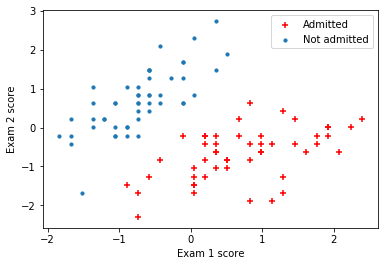

In [26]:
plt.scatter(Xpos.iloc[:,0],Xpos.iloc[:,1],c="r",marker="+")
plt.scatter(Xneg.iloc[:,0],Xneg.iloc[:,1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)